<a href="https://colab.research.google.com/github/hfmandell/Hack4BlackLives2021/blob/main/Superfund_Demographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superfund Demographics
### Author: Hannah Mandell
An exploration of Superfund sites and the demographics of the counties they reside in.

In [ ]:
import pandas as pd
import numpy as np

Let's import some data:

###Introducing the Census data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#census data
#here's the metadata:
#https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/cc-est2019-alldata.pdf


In [ ]:
census = pd.read_csv('/content/drive/MyDrive/census2019county_full.csv', encoding = 'ISO-8859-1')

census.head(300)

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,21295,22002,4559,5130,119,139,200,284,29,18,367,429,21633,22391,4704,5306,277,314,300,409,42,37,25875,27386,20709,21485,4512,5091,103,115,194,280,13,9,344,406,21026,21853,4647,5258,251,282,291,398,23,27,694,616,586,517,47,39,16,24,6,4,16,9,23,23,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,1411,1316,362,317,5,3,13,15,1,0,74,62,1479,1368,405,362,23,18,34,28,3,1,1778,1651,1337,1260,356,313,2,2,13,15,0,0,70,61,1402,1312,396,357,19,17,34,28,1,0,88,62,74,56,6,4,3,1,0,0,1,0,4,1,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,1521,1526,399,374,14,8,17,21,1,3,49,58,1570,1583,425,403,27,19,32,42,3,4,1933,1916,1460,1465,398,372,12,2,17,21,0,3,46,53,1506,1517,423,400,25,12,30,39,1,4,68,74,61,61,1,2,2,6,0,0,1,0,3,5,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,1658,1620,431,406,15,12,23,18,4,1,40,62,1694,1681,453,436,29,27,32,37,4,5,2105,2055,1613,1570,421,403,12,9,22,18,3,0,34,55,1643,1624,440,429,24,22,30,36,3,4,66,64,45,50,10,3,3,3,1,0,1,1,6,7,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,1628,1585,502,424,12,7,25,14,4,2,42,45,1664,1624,525,444,23,20,39,31,6,5,2153,2026,1580,1543,495,420,12,5,23,14,1,1,42,43,1616,1580,518,439,23,18,37,30,3,4,60,51,48,42,7,4,0,2,2,0,3,1,0,2,48,44,7,5,0,2,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,50,1,3,Alabama,Baldwin County,4,10,13173,6452,6721,5720,5866,571,656,60,60,39,74,1,8,61,57,5773,5917,579,668,109,106,48,85,4,11,6228,6512,5518,5674,568,651,51,56,38,73,1,7,52,51,5565,5720,573,660,95,98,45,81,2,9,224,209,202,192,3,5,9,4,1,1,0,1,9,6,208,197,6,8,14,8,3,4,2,2
296,50,1,3,Alabama,Baldwin County,4,11,13804,6559,7245,5757,6364,646,696,58,59,30,50,2,2,66,74,5818,6437,651,703,112,119,41,60,5,7,6386,7093,5606,6229,641,690,50,55,29,49,1,2,59,68,5660,6296,645,695,98,111,39,58,4,7,173,152,151,135,5,6,8,4,1,1,1,0,7,6,158,141,6,8,14,8,2,2,1,0
297,50,1,3,Alabama,Baldwin County,4,12,13039,6190,6849,5584,6113,487,576,42,55,25,48,1,2,51,55,5630,6165,496,582,85,101,31,53,1,5,6063,6731,5469,6013,481,569,39,51,25,48,1,2,48,48,5512,6058,488,573,80,91,31,53,1,5,127,118,115,100,6,7,3,4,0,0,0,0,3,7,118,107,8,9,5,10,0,0,0,0
298,50,1,3,Alabama,Baldwin County,4,13,12689,6042,6647,5530,6089,414,449,39,40,22,25,2,2,35,42,5563,6127,417,454,72,79,24,30,2,4,5958,6572,5452,6019,414,447,38,39,20,24,2,2,32,41,5482,6056,417,452,69,77,21,29,2,4,84,75,78,70,0,2,1,1,2,1,0,0,3,1,81,71,0,2,3,2,3,1,0,0


We are only looking at 2019 data (`YEAR == 12`).

In [ ]:
census = census[census['YEAR'] == 12]
census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
209,50,1,1,Alabama,Autauga County,12,0,55869,27092,28777,20878,21729,5237,6000,121,145,286,370,32,26,538,507,21372,22191,5514,6270,274,301,441,509,55,49,26208,27990,20138,21077,5171,5927,105,138,282,364,20,20,492,464,20594,21504,5425,6177,234,274,426,490,39,38,884,787,740,652,66,73,16,7,4,6,12,6,46,43,778,687,89,93,40,27,15,19,16,11
210,50,1,1,Alabama,Autauga County,12,1,3277,1713,1564,1249,1117,339,344,4,6,24,20,3,3,94,74,1337,1189,409,396,13,15,46,33,7,6,1627,1504,1180,1072,334,340,3,6,23,19,2,3,85,64,1261,1136,399,390,7,10,43,29,4,3,86,60,69,45,5,4,1,0,1,1,1,0,9,10,76,53,10,6,6,5,3,4,3,3
211,50,1,1,Alabama,Autauga County,12,2,3465,1787,1678,1287,1191,388,368,10,9,17,25,0,2,85,83,1369,1270,450,430,21,20,35,38,2,5,1699,1608,1210,1134,388,359,7,8,16,25,0,1,78,81,1286,1211,448,420,13,18,33,38,1,4,88,70,77,57,0,9,3,1,1,0,0,1,7,2,83,59,2,10,8,2,2,0,1,1
212,50,1,1,Alabama,Autauga County,12,3,3851,1977,1874,1441,1350,442,418,3,9,18,25,2,4,71,68,1510,1415,490,465,10,14,35,49,6,6,1883,1795,1362,1285,435,409,3,9,17,24,0,3,66,65,1426,1348,479,453,8,12,34,47,4,5,94,79,79,65,7,9,0,0,1,1,2,1,5,3,84,67,11,12,2,2,1,2,2,1
213,50,1,1,Alabama,Autauga County,12,4,3659,1854,1805,1341,1334,434,400,5,0,21,13,5,3,48,55,1386,1383,463,432,12,12,33,31,9,4,1791,1731,1291,1272,429,397,4,0,21,13,3,3,43,46,1331,1315,456,426,8,7,33,27,6,4,63,74,50,62,5,3,1,0,0,0,2,0,5,9,55,68,7,6,4,5,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716371,50,56,45,Wyoming,Weston County,12,14,499,280,219,256,203,0,1,2,0,19,12,0,0,3,3,258,206,1,1,5,2,19,13,0,0,276,214,252,198,0,1,2,0,19,12,0,0,3,3,254,201,1,1,5,2,19,13,0,0,4,5,4,5,0,0,0,0,0,0,0,0,0,0,4,5,0,0,0,0,0,0,0,0
716372,50,56,45,Wyoming,Weston County,12,15,352,180,172,173,169,0,0,1,1,3,1,0,0,3,1,176,170,0,1,3,1,4,1,0,0,176,170,172,167,0,0,1,1,0,1,0,0,3,1,175,168,0,1,3,1,1,1,0,0,4,2,1,2,0,0,0,0,3,0,0,0,0,0,1,2,0,0,0,0,3,0,0,0
716373,50,56,45,Wyoming,Weston County,12,16,229,107,122,105,120,0,0,0,2,0,0,0,0,2,0,107,120,0,0,2,2,0,0,0,0,105,122,103,120,0,0,0,2,0,0,0,0,2,0,105,120,0,0,2,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
716374,50,56,45,Wyoming,Weston County,12,17,198,82,116,80,115,0,0,1,1,0,0,0,0,1,0,81,115,0,0,1,1,1,0,0,0,80,115,79,114,0,0,0,1,0,0,0,0,1,0,80,114,0,0,0,1,1,0,0,0,2,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [ ]:
census = pd.read_csv('/content/drive/MyDrive/census2019county_BAC.csv', encoding = 'ISO-8859-1')

census.head(300)

Since the Superfund site data doesn't have 'County', etc. after the county names, we have to do a bit of data engineering here. 

In [ ]:
census['CTYNAME']=census['CTYNAME'].str.replace('County', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Parish', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Census Area', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Municipality', '')
census['CTYNAME']=census['CTYNAME'].str.replace('City and Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('city', '')

#census['CTYNAME']=census['CTYNAME'].str.split(' ',expand=True)[0:-1].str[:-1]

census['CTYNAME']=census['CTYNAME'].str.strip(' ')
census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
209,50,1,1,Alabama,Autauga,12,0,55869,27092,28777,20878,21729,5237,6000,121,145,286,370,32,26,538,507,21372,22191,5514,6270,274,301,441,509,55,49,26208,27990,20138,21077,5171,5927,105,138,282,364,20,20,492,464,20594,21504,5425,6177,234,274,426,490,39,38,884,787,740,652,66,73,16,7,4,6,12,6,46,43,778,687,89,93,40,27,15,19,16,11
210,50,1,1,Alabama,Autauga,12,1,3277,1713,1564,1249,1117,339,344,4,6,24,20,3,3,94,74,1337,1189,409,396,13,15,46,33,7,6,1627,1504,1180,1072,334,340,3,6,23,19,2,3,85,64,1261,1136,399,390,7,10,43,29,4,3,86,60,69,45,5,4,1,0,1,1,1,0,9,10,76,53,10,6,6,5,3,4,3,3
211,50,1,1,Alabama,Autauga,12,2,3465,1787,1678,1287,1191,388,368,10,9,17,25,0,2,85,83,1369,1270,450,430,21,20,35,38,2,5,1699,1608,1210,1134,388,359,7,8,16,25,0,1,78,81,1286,1211,448,420,13,18,33,38,1,4,88,70,77,57,0,9,3,1,1,0,0,1,7,2,83,59,2,10,8,2,2,0,1,1
212,50,1,1,Alabama,Autauga,12,3,3851,1977,1874,1441,1350,442,418,3,9,18,25,2,4,71,68,1510,1415,490,465,10,14,35,49,6,6,1883,1795,1362,1285,435,409,3,9,17,24,0,3,66,65,1426,1348,479,453,8,12,34,47,4,5,94,79,79,65,7,9,0,0,1,1,2,1,5,3,84,67,11,12,2,2,1,2,2,1
213,50,1,1,Alabama,Autauga,12,4,3659,1854,1805,1341,1334,434,400,5,0,21,13,5,3,48,55,1386,1383,463,432,12,12,33,31,9,4,1791,1731,1291,1272,429,397,4,0,21,13,3,3,43,46,1331,1315,456,426,8,7,33,27,6,4,63,74,50,62,5,3,1,0,0,0,2,0,5,9,55,68,7,6,4,5,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716371,50,56,45,Wyoming,Weston,12,14,499,280,219,256,203,0,1,2,0,19,12,0,0,3,3,258,206,1,1,5,2,19,13,0,0,276,214,252,198,0,1,2,0,19,12,0,0,3,3,254,201,1,1,5,2,19,13,0,0,4,5,4,5,0,0,0,0,0,0,0,0,0,0,4,5,0,0,0,0,0,0,0,0
716372,50,56,45,Wyoming,Weston,12,15,352,180,172,173,169,0,0,1,1,3,1,0,0,3,1,176,170,0,1,3,1,4,1,0,0,176,170,172,167,0,0,1,1,0,1,0,0,3,1,175,168,0,1,3,1,1,1,0,0,4,2,1,2,0,0,0,0,3,0,0,0,0,0,1,2,0,0,0,0,3,0,0,0
716373,50,56,45,Wyoming,Weston,12,16,229,107,122,105,120,0,0,0,2,0,0,0,0,2,0,107,120,0,0,2,2,0,0,0,0,105,122,103,120,0,0,0,2,0,0,0,0,2,0,105,120,0,0,2,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
716374,50,56,45,Wyoming,Weston,12,17,198,82,116,80,115,0,0,1,1,0,0,0,0,1,0,81,115,0,0,1,1,1,0,0,0,80,115,79,114,0,0,0,1,0,0,0,0,1,0,80,114,0,0,0,1,1,0,0,0,2,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0


Ah, much better :)

Now, we make a 'County, State' column so that we'll be able to match superfund sites to their correct census data (some states have counties with the same name!)

In [ ]:
census['CountyState']= census['CTYNAME'].str.cat(census['STNAME'], sep =", ") 
census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,...,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,CountyState
209,50,1,1,Alabama,Autauga,12,0,55869,27092,28777,20878,21729,5237,6000,121,145,286,370,32,26,538,507,21372,22191,5514,6270,274,301,441,509,55,49,26208,27990,20138,21077,5171,5927,105,138,...,364,20,20,492,464,20594,21504,5425,6177,234,274,426,490,39,38,884,787,740,652,66,73,16,7,4,6,12,6,46,43,778,687,89,93,40,27,15,19,16,11,"Autauga, Alabama"
210,50,1,1,Alabama,Autauga,12,1,3277,1713,1564,1249,1117,339,344,4,6,24,20,3,3,94,74,1337,1189,409,396,13,15,46,33,7,6,1627,1504,1180,1072,334,340,3,6,...,19,2,3,85,64,1261,1136,399,390,7,10,43,29,4,3,86,60,69,45,5,4,1,0,1,1,1,0,9,10,76,53,10,6,6,5,3,4,3,3,"Autauga, Alabama"
211,50,1,1,Alabama,Autauga,12,2,3465,1787,1678,1287,1191,388,368,10,9,17,25,0,2,85,83,1369,1270,450,430,21,20,35,38,2,5,1699,1608,1210,1134,388,359,7,8,...,25,0,1,78,81,1286,1211,448,420,13,18,33,38,1,4,88,70,77,57,0,9,3,1,1,0,0,1,7,2,83,59,2,10,8,2,2,0,1,1,"Autauga, Alabama"
212,50,1,1,Alabama,Autauga,12,3,3851,1977,1874,1441,1350,442,418,3,9,18,25,2,4,71,68,1510,1415,490,465,10,14,35,49,6,6,1883,1795,1362,1285,435,409,3,9,...,24,0,3,66,65,1426,1348,479,453,8,12,34,47,4,5,94,79,79,65,7,9,0,0,1,1,2,1,5,3,84,67,11,12,2,2,1,2,2,1,"Autauga, Alabama"
213,50,1,1,Alabama,Autauga,12,4,3659,1854,1805,1341,1334,434,400,5,0,21,13,5,3,48,55,1386,1383,463,432,12,12,33,31,9,4,1791,1731,1291,1272,429,397,4,0,...,13,3,3,43,46,1331,1315,456,426,8,7,33,27,6,4,63,74,50,62,5,3,1,0,0,0,2,0,5,9,55,68,7,6,4,5,0,4,3,0,"Autauga, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716371,50,56,45,Wyoming,Weston,12,14,499,280,219,256,203,0,1,2,0,19,12,0,0,3,3,258,206,1,1,5,2,19,13,0,0,276,214,252,198,0,1,2,0,...,12,0,0,3,3,254,201,1,1,5,2,19,13,0,0,4,5,4,5,0,0,0,0,0,0,0,0,0,0,4,5,0,0,0,0,0,0,0,0,"Weston, Wyoming"
716372,50,56,45,Wyoming,Weston,12,15,352,180,172,173,169,0,0,1,1,3,1,0,0,3,1,176,170,0,1,3,1,4,1,0,0,176,170,172,167,0,0,1,1,...,1,0,0,3,1,175,168,0,1,3,1,1,1,0,0,4,2,1,2,0,0,0,0,3,0,0,0,0,0,1,2,0,0,0,0,3,0,0,0,"Weston, Wyoming"
716373,50,56,45,Wyoming,Weston,12,16,229,107,122,105,120,0,0,0,2,0,0,0,0,2,0,107,120,0,0,2,2,0,0,0,0,105,122,103,120,0,0,0,2,...,0,0,0,2,0,105,120,0,0,2,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,"Weston, Wyoming"
716374,50,56,45,Wyoming,Weston,12,17,198,82,116,80,115,0,0,1,1,0,0,0,0,1,0,81,115,0,0,1,1,1,0,0,0,80,115,79,114,0,0,0,1,...,0,0,0,1,0,80,114,0,0,0,1,1,0,0,0,2,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,"Weston, Wyoming"


### Introducing the Superfund site data

In [ ]:
#superfund data
#superfunds = pd.read_csv("superfunds.csv")
superfunds = pd.read_csv('/content/drive/MyDrive/superfunds.csv')
superfunds

,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
0,Army Creek Landfill,69.92,DED980494496,300086,3,Delaware,New Castle County,New Castle,NPL Site,39.653061,-75.608331,12/30/1982,09/08/1983,04/29/1994,236,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,13,-8.416681e+06,4.815653e+06
1,Delaware Sand & Gravel Landfill,46.60,DED000605972,300034,3,Delaware,New Castle County,New Castle,NPL Site,39.651389,-75.602781,12/30/1982,09/08/1983,08/12/1997,445,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,14,-8.416063e+06,4.815412e+06
2,Delaware City PVC Plant,30.55,DED980551667,300091,3,Delaware,Delaware City,New Castle,NPL Site,39.586111,-75.649439,12/30/1982,09/08/1983,09/26/2001,787,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,15,-8.421257e+06,4.805978e+06
3,"Harvey & Knott Drum, Inc.",30.77,DED980713093,300123,3,Delaware,Kirkwood,New Castle,NPL Site,39.573331,-75.770839,12/30/1982,09/08/1983,06/22/1994,238,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,16,-8.434771e+06,4.804132e+06
4,New Castle Steel,30.40,DED980705255,300106,3,Delaware,New Castle County,New Castle,Deleted NPL Site,39.657781,-75.577769,12/30/1982,09/08/1983,08/17/1988,30,09/22/1988,03/17/1989,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,17,-8.413279e+06,4.816336e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,Barber Orchard,70.71,NCSFN0406989,406989,4,North Carolina,Waynesville,Haywood,NPL Site,35.445833,-83.063889,01/11/2001,09/13/2001,09/29/2011,1116,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,173,-9.246630e+06,4.224634e+06
1706,Cooper Drum Company,50.00,CAD055753370,903253,9,California,South Gate,Los Angeles,NPL Site,33.946972,-118.179694,01/11/2001,06/14/2001,NaN,0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,354,-1.315570e+07,4.021684e+06
1707,Quanta Resources,50.00,NJD000606442,200034,2,New Jersey,Edgewater,Bergen,NPL Site,40.804306,-73.989167,01/11/2001,09/05/2002,NaN,0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href="

### Exploring the status of Superfund sites
Which are active? Completed? TBD?

In [ ]:
active = superfunds[superfunds["Status"] == "NPL Site"].shape
proposed = superfunds[superfunds["Status"] == "Deleted NPL Site"].shape
deleted = superfunds[superfunds["Status"] == "Proposed NPL Site"].shape

(active, proposed, deleted)

((1259, 32), (404, 32), (47, 32))

There are 1259 active sites, 404 deleted sites, and 47 proposed sites at the moment. 

Let's make another one of those 'County, State' columns for our upcoming join:

In [ ]:
superfunds['CountyState']= superfunds['County'].str.cat(superfunds['State'], sep =", ") 
superfunds

,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y,CountyState
0,Army Creek Landfill,69.92,DED980494496,300086,3,Delaware,New Castle County,New Castle,NPL Site,39.653061,-75.608331,12/30/1982,09/08/1983,04/29/1994,236,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,13,-8.416681e+06,4.815653e+06,"New Castle, Delaware"
1,Delaware Sand & Gravel Landfill,46.60,DED000605972,300034,3,Delaware,New Castle County,New Castle,NPL Site,39.651389,-75.602781,12/30/1982,09/08/1983,08/12/1997,445,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,14,-8.416063e+06,4.815412e+06,"New Castle, Delaware"
2,Delaware City PVC Plant,30.55,DED980551667,300091,3,Delaware,Delaware City,New Castle,NPL Site,39.586111,-75.649439,12/30/1982,09/08/1983,09/26/2001,787,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,15,-8.421257e+06,4.805978e+06,"New Castle, Delaware"
3,"Harvey & Knott Drum, Inc.",30.77,DED980713093,300123,3,Delaware,Kirkwood,New Castle,NPL Site,39.573331,-75.770839,12/30/1982,09/08/1983,06/22/1994,238,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,16,-8.434771e+06,4.804132e+06,"New Castle, Delaware"
4,New Castle Steel,30.40,DED980705255,300106,3,Delaware,New Castle County,New Castle,Deleted NPL Site,39.657781,-75.577769,12/30/1982,09/08/1983,08/17/1988,30,09/22/1988,03/17/1989,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,17,-8.413279e+06,4.816336e+06,"New Castle, Delaware"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,Barber Orchard,70.71,NCSFN0406989,406989,4,North Carolina,Waynesville,Haywood,NPL Site,35.445833,-83.063889,01/11/2001,09/13/2001,09/29/2011,1116,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,173,-9.246630e+06,4.224634e+06,"Haywood, North Carolina"
1706,Cooper Drum Company,50.00,CAD055753370,903253,9,California,South Gate,Los Angeles,NPL Site,33.946972,-118.179694,01/11/2001,06/14/2001,NaN,0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,354,-1.315570e+07,4.021684e+06,"Los Angeles, California"
1707,Quanta Resources,50.00,NJD000606442,200034,2,New Jersey,Edgewater,Bergen

And now, we index the dataframe by our newly created column, `CountyState`.



In [ ]:
superfunds_series = superfunds.set_index('CountyState').squeeze()
superfunds_series 

,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"New Castle, Delaware",Army Creek Landfill,69.92,DED980494496,300086,3,Delaware,New Castle County,New Castle,NPL Site,39.653061,-75.608331,12/30/1982,09/08/1983,04/29/1994,236,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,13,-8.416681e+06,4.815653e+06
"New Castle, Delaware",Delaware Sand & Gravel Landfill,46.60,DED000605972,300034,3,Delaware,New Castle County,New Castle,NPL Site,39.651389,-75.602781,12/30/1982,09/08/1983,08/12/1997,445,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,14,-8.416063e+06,4.815412e+06
"New Castle, Delaware",Delaware City PVC Plant,30.55,DED980551667,300091,3,Delaware,Delaware City,New Castle,NPL Site,39.586111,-75.649439,12/30/1982,09/08/1983,09/26/2001,787,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,15,-8.421257e+06,4.805978e+06
"New Castle, Delaware","Harvey & Knott Drum, Inc.",30.77,DED980713093,300123,3,Delaware,Kirkwood,New Castle,NPL Site,39.573331,-75.770839,12/30/1982,09/08/1983,06/22/1994,238,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,16,-8.434771e+06,4.804132e+06
"New Castle, Delaware",New Castle Steel,30.40,DED980705255,300106,3,Delaware,New Castle County,New Castle,Deleted NPL Site,39.657781,-75.577769,12/30/1982,09/08/1983,08/17/1988,30,09/22/1988,03/17/1989,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,17,-8.413279e+06,4.816336e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Haywood, North Carolina",Barber Orchard,70.71,NCSFN0406989,406989,4,North Carolina,Waynesville,Haywood,NPL Site,35.445833,-83.063889,01/11/2001,09/13/2001,09/29/2011,1116,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,173,-9.246630e+06,4.224634e+06
"Los Angeles, California",Cooper Drum Company,50.00,CAD055753370,903253,9,California,South Gate,Los Angeles,NPL Site,33.946972,-118.179694,01/11/2001,06/14/2001,NaN,0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,354,-1.315570e+07,4.021684e+06
"Bergen, New Jersey",Quanta Resources,50.00,NJD000606442,200034,2,New

### Make a column for the % of Each Minority Group for each county
Add the population of black & black-mixed males (`BAC_MALE`) and females (`BAC_FEMALE`)and then divide them by the county's total population (`TOT_POP`).


In [ ]:
census.head()

,YEAR,AGEGRP,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,BAC_MALE,BAC_FEMALE,CountyState
0,12,0,1,1,Alabama,Autauga,55869,5514,6270,"Autauga, Alabama"
1,12,0,1,3,Alabama,Baldwin,223234,10346,11008,"Baldwin, Alabama"
2,12,0,1,5,Alabama,Barbour,24686,6432,5685,"Barbour, Alabama"
3,12,0,1,7,Alabama,Bibb,22394,3010,1897,"Bibb, Alabama"
4,12,0,1,9,Alabama,Blount,57826,658,618,"Blount, Alabama"


###Joining the Superfund and County Data

In [ ]:
census["PCNT_BLACK"] = (census["BAC_MALE"] + census["BAC_FEMALE"]) / census["TOT_POP"]

census_series = census.set_index('CountyState').squeeze()

superfund_and_census = census_series.join(superfunds_series)

#remove any counties that aren't in the superfund dataset
superfund_and_census = superfund_and_census[superfund_and_census['Site Score'].notna()]
superfund_and_census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,...,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,PCNT_BLACK,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Acadia, Louisiana",50,22,1,Louisiana,Acadia,12,0,62045,30359,31686,24230,25205,5396,5747,142,111,82,128,7,10,502,485,24686,25664,5791,6108,232,208,140,174,23,29,29368,30945,23390,24581,5321,5688,112,96,...,75,44,29,14,13,3,6,0.191780,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.617500,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Adams, Colorado",50,8,1,Colorado,Adams,12,0,517421,261615,255806,224147,219381,11145,9699,6239,5848,11268,11969,567,566,8249,8343,231691,227068,14327,12744,9642,9409,13981,14695,1087,1101,153774,152508,127158,126522,9100,7742,1516,1549,...,2752,6884,6594,1369,1382,445,431,0.052319,Sand Creek Industrial,59.65,COD980717953,800260.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.791669,-104.936100,12/30/1982,09/08/1983,09/29/1994,272.0,08/28/1996,12/20/1996,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...",NaN,No,NaN,NaN,NaN,NaN,374.0,-1.168143e+07,4.835714e+06
"Adams, Colorado",50,8,1,Colorado,Adams,12,0,517421,261615,255806,224147,219381,11145,9699,6239,5848,11268,11969,567,566,8249,8343,231691,227068,14327,12744,9642,9409,13981,14695,1087,1101,153774,152508,127158,126522,9100,7742,1516,1549,...,2752,6884,6594,1369,1382,445,431,0.052319,Woodbury Chemical Co.,44.87,COD980667075,800244.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.795000,-104.942400,12/30/1982,09/08/1983,03/26/1992,75.0,12/29/1992,03/22/1993,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,375.0,-1.168213e+07,4.836197e+06
"Adams, Colorado",50,8,1,Colorado,Adams,12,0,517421,261615,255806,224147,219381,11145,9699,6239,5848,11268,11969,567,566,8249,8343,231691,227068,14327,12744,9642,9409,13981,14695,1087,1101,153774,152508,127158,126522,9100,7742,1516,1549,...,2752,6884,6594,1369,1382,445,431,0.052319,Rocky Mountain Arsenal (USARMY),58.15,CO5210020769,800357.0,8.0,Colorado,Adams County,Adams,NPL Site,39.835561,-104.884200,10/15/1984,07/22/1987,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/d

In [ ]:
superfund_and_census.index.unique()

Index(['Acadia, Louisiana', 'Adams, Colorado', 'Adams, Illinois',
       'Adams, Nebraska', 'Adams, Pennsylvania', 'Aiken, South Carolina',
       'Alachua, Florida', 'Alameda, California', 'Albany, New York',
       'Albany, Wyoming',
       ...
       'Yavapai, Arizona', 'Yell, Arkansas', 'Yellowstone, Montana',
       'Yolo, California', 'York, Maine', 'York, Nebraska',
       'York, Pennsylvania', 'York, South Carolina', 'York, Virginia',
       'Yuma, Arizona'],
      dtype='object', name='CountyState', length=730)

Therefor, 1.2% (730/59,698) of U.S. counties have at least one Superfund site.

Let's check that we're only using 'all age groups' and data from the most recent census work, July 2019. Then, let's focus in on only the columns that will be helpful for us. AND, we'll create a 'Percent Black' column that tells us the Black proportion of the county's population.

In [ ]:
census = census[census['AGEGRP'] == 0]
census = census[census['YEAR'] == 12]

black_census = census.loc[:, ["STATE", "CountyState", "STNAME", "CTYNAME", "TOT_POP", "BAC_MALE", "BAC_FEMALE"]]
black_census["PCNT_BLACK"] = (black_census["BAC_MALE"] + black_census["BAC_FEMALE"]) / black_census["TOT_POP"]
black_census

,STATE,CountyState,STNAME,CTYNAME,TOT_POP,BAC_MALE,BAC_FEMALE,PCNT_BLACK
209,1,"Autauga, Alabama",Alabama,Autauga,55869,5514,6270,0.210922
437,1,"Baldwin, Alabama",Alabama,Baldwin,223234,10346,11008,0.095657
665,1,"Barbour, Alabama",Alabama,Barbour,24686,6432,5685,0.490845
893,1,"Bibb, Alabama",Alabama,Bibb,22394,3010,1897,0.219121
1121,1,"Blount, Alabama",Alabama,Blount,57826,658,618,0.022066
...,...,...,...,...,...,...,...,...
715445,56,"Sweetwater, Wyoming",Wyoming,Sweetwater,42343,481,389,0.020546
715673,56,"Teton, Wyoming",Wyoming,Teton,23464,147,110,0.010953
715901,56,"Uinta, Wyoming",Wyoming,Uinta,20226,122,111,0.011520
716129,56,"Washakie, Wyoming",Wyoming,Washakie,7805,55,38,0.011915


In [ ]:
superfund_and_census.to_csv("Census_County_and_Superfund_ALL.csv", encoding='utf-8', index=False)
superfund_and_census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,...,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,PCNT_BLACK,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Abbeville, South Carolina",50,45,1,South Carolina,Abbeville,12,0,24527,11871,12656,8432,8791,3178,3598,42,43,35,54,1,4,183,166,8591,8941,3304,3710,101,95,54,75,10,7,11661,12464,8256,8636,3155,3571,37,42,...,30,7,3,0,4,0,0,0.285971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Abbeville, South Carolina",50,45,1,South Carolina,Abbeville,12,1,1165,570,595,369,398,177,174,3,0,2,0,0,0,19,23,388,420,194,194,6,1,2,3,0,0,555,583,356,388,177,173,3,0,...,1,1,0,0,1,0,0,0.333047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Abbeville, South Carolina",50,45,1,South Carolina,Abbeville,12,2,1311,676,635,439,420,205,190,3,0,0,2,0,1,29,22,466,441,231,209,7,5,1,2,0,1,664,604,429,396,204,188,2,0,...,4,1,1,0,2,0,0,0.335622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Abbeville, South Carolina",50,45,1,South Carolina,Abbeville,12,3,1484,775,709,533,472,210,200,3,4,5,2,0,1,24,30,556,502,230,225,5,5,6,7,2,1,764,695,523,460,209,198,3,4,...,2,0,0,0,0,0,0,0.306604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Abbeville, South Carolina",50,45,1,South Carolina,Abbeville,12,4,1618,820,798,593,559,198,215,3,1,11,5,0,1,15,17,607,574,209,227,6,5,13,7,0,2,800,779,578,543,194,213,3,1,...,2,1,1,0,0,0,0,0.269468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ziebach, South Dakota",50,46,137,South Dakota,Ziebach,12,14,86,40,46,13,12,0,0,27,34,0,0,0,0,0,0,13,12,0,0,27,34,0,0,0,0,40,46,13,12,0,0,27,34,...,0,0,0,0,0,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Ziebach, South Dakota",50,46,137,South Dakota,Ziebach,12,15,65,26,39,13,10,0,0,13,28,0,0,0,0,0,1,13,11,0,0,13,29,0,0,0,0,26,39,13,10,0,0,13,28,...,0,0,0,0,0,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Ziebach, South Dakota",50,46,137,South Dakota,Ziebach,12,16,52,26,26,15,13,0,0,11,13,0,0,0,0,0,0,15,13,0,0,11,13,0,0,0,0,26,26,15,13,0,0,11,13,...,0,0,0,0,0,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's filter these so that the % Black is above the national average of 13%. We can go ahead and remove the population data too.

source: https://www.indexmundi.com/facts/united-states/quick-facts/all-states/black-population-percentage#map 



In [ ]:
black_census = black_census[black_census["PCNT_BLACK"] > 0.13]
del black_census['BAC_MALE']
del black_census['BAC_FEMALE']
del black_census['TOT_POP']
del black_census['STATE']
black_census

,CountyState,STNAME,CTYNAME,PCNT_BLACK
209,"Autauga, Alabama",Alabama,Autauga,0.210922
665,"Barbour, Alabama",Alabama,Barbour,0.490845
893,"Bibb, Alabama",Alabama,Bibb,0.219121
1349,"Bullock, Alabama",Alabama,Bullock,0.709930
1577,"Butler, Alabama",Alabama,Butler,0.455831
...,...,...,...,...
672809,"Waynesboro, Virginia",Virginia,Waynesboro,0.160097
673037,"Williamsburg, Virginia",Virginia,Williamsburg,0.175003
673265,"Winchester, Virginia",Virginia,Winchester,0.138151
704045,"Milwaukee, Wisconsin",Wisconsin,Milwaukee,0.291590


In [ ]:
black_census.to_csv("Black_Census_County.csv", encoding='utf-8', index=False)

747 of the 3142 counties in this census data have a Black population percentage that is higher than the national average (13%). That is a little under 24%. 

Let's make `black_census` indexed by CountyState so the join will work.

In [ ]:
black_census_series = black_census.set_index('CountyState').squeeze()
black_census_series

,STNAME,CTYNAME,PCNT_BLACK
CountyState,,,
"Autauga, Alabama",Alabama,Autauga,0.210922
"Barbour, Alabama",Alabama,Barbour,0.490845
"Bibb, Alabama",Alabama,Bibb,0.219121
"Bullock, Alabama",Alabama,Bullock,0.709930
"Butler, Alabama",Alabama,Butler,0.455831
...,...,...,...
"Waynesboro, Virginia",Virginia,Waynesboro,0.160097
"Williamsburg, Virginia",Virginia,Williamsburg,0.175003
"Winchester, Virginia",Virginia,Winchester,0.138151


We now see that the counties with less than 13% Black & Black-mixed populations are gone. This step removed just shy of 1200 counties.

###Joining the Superfund data and Black Census data

In [ ]:
superfund_and_blackcensus = black_census_series.join(superfunds_series)

#remove any counties that aren't in the superfund dataset
superfund_and_blackcensus = superfund_and_blackcensus[superfund_and_blackcensus['Site Score'].notna()]
superfund_and_blackcensus

,STNAME,CTYNAME,PCNT_BLACK,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Acadia, Louisiana",Louisiana,Acadia,0.191780,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.617500,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Aiken, South Carolina",South Carolina,Aiken,0.265216,Clearwater Finishing,47.99,SCD003303120,403391.0,4.0,South Carolina,Clearwater,Aiken,NPL Site,33.500907,-81.892130,11/08/2019,09/03/2020,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2019-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2020-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1204.0,-9.116190e+06,3.961981e+06
"Alachua, Florida",Florida,Alachua,0.222459,Cabot/Koppers,36.69,FLD980709356,400903.0,4.0,Florida,Gainesville,Alachua,NPL Site,29.675000,-82.323061,09/08/1983,09/21/1984,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,62.0,-9.164161e+06,3.461842e+06
"Albany, New York",New York,Albany,0.158632,"Mercury Refining, Inc.",44.58,NYD048148175,201552.0,2.0,New York,Colonie,Albany,NPL Site,42.689719,-73.804169,12/30/1982,09/08/1983,04/30/2015,1170.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1535.0,-8.215843e+06,5.264863e+06
"Alexander, Illinois",Illinois,Alexander,0.332755,Ilada Energy Co.,34.21,ILD980996789,500942.0,5.0,Illinois,East Cape Girardeau,Alexander,Deleted NPL Site,37.258400,-89.463500,06/24/1988,10/04/1989,09/28/1999,654.0,11/09/2000,01/08/2001,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2000-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2000-...",NaN,No,NaN,NaN,NaN,NaN,412.0,-9.959031e+06,4.475186e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"York, South Carolina",South Carolina,York,0.206457,"Leonard Chemical Co., Inc.",47.10,SCD991279324,403481.0,4.0,South Carolina,Rock Hill,York,NPL Site,34.851669,-80.904169,09/08/1983,09/21/1984,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1176.0,-9.006211e+06,4.143742e+06
"York, South Carolina",South Carolina,York,0.206457,Rock Hill Chemical Co.,40.29,SCD980844005,403425.0,4.0,South Carolina,Rock Hill,York,NPL Site,34.966100,-80.998500,06/24/1988,02/21/1990,12/31/1996,419.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a h

In [ ]:
superfund_and_blackcensus.to_csv("SuperFund_and_BlackCensus.csv", encoding='utf-8', index=False)

Here we have all the Superfunds within counties that have greater than 13% black population, all **587** of them (that's ***34%*** of all Superfunds in the database). Let's just clean it up a smidge:

In [ ]:
del superfund_and_blackcensus["STNAME"]
superfund_and_blackcensus

,CTYNAME,PCNT_BLACK,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Acadia, Louisiana",Acadia,0.191780,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.617500,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Aiken, South Carolina",Aiken,0.265216,Clearwater Finishing,47.99,SCD003303120,403391.0,4.0,South Carolina,Clearwater,Aiken,NPL Site,33.500907,-81.892130,11/08/2019,09/03/2020,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2019-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2020-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1204.0,-9.116190e+06,3.961981e+06
"Alachua, Florida",Alachua,0.222459,Cabot/Koppers,36.69,FLD980709356,400903.0,4.0,Florida,Gainesville,Alachua,NPL Site,29.675000,-82.323061,09/08/1983,09/21/1984,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,62.0,-9.164161e+06,3.461842e+06
"Albany, New York",Albany,0.158632,"Mercury Refining, Inc.",44.58,NYD048148175,201552.0,2.0,New York,Colonie,Albany,NPL Site,42.689719,-73.804169,12/30/1982,09/08/1983,04/30/2015,1170.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1535.0,-8.215843e+06,5.264863e+06
"Alexander, Illinois",Alexander,0.332755,Ilada Energy Co.,34.21,ILD980996789,500942.0,5.0,Illinois,East Cape Girardeau,Alexander,Deleted NPL Site,37.258400,-89.463500,06/24/1988,10/04/1989,09/28/1999,654.0,11/09/2000,01/08/2001,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2000-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2000-...",NaN,No,NaN,NaN,NaN,NaN,412.0,-9.959031e+06,4.475186e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"York, South Carolina",York,0.206457,"Leonard Chemical Co., Inc.",47.10,SCD991279324,403481.0,4.0,South Carolina,Rock Hill,York,NPL Site,34.851669,-80.904169,09/08/1983,09/21/1984,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1176.0,-9.006211e+06,4.143742e+06
"York, South Carolina",York,0.206457,Rock Hill Chemical Co.,40.29,SCD980844005,403425.0,4.0,South Carolina,Rock Hill,York,NPL Site,34.966100,-80.998500,06/24/1988,02/21/1990,12/31/1996,419.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/docume

In [ ]:
superfund_and_blackcensus.index.unique()
# there are 215 unique counties with both superfund sites and a black population >13%

Index(['Acadia, Louisiana', 'Aiken, South Carolina', 'Alachua, Florida',
       'Albany, New York', 'Alexander, Illinois', 'Allegheny, Pennsylvania',
       'Allen, Indiana', 'Allendale, South Carolina', 'Anne Arundel, Maryland',
       'Arapahoe, Colorado',
       ...
       'Wayne, Michigan', 'Webster, Louisiana', 'Westchester, New York',
       'Westmoreland, Virginia', 'Will, Illinois', 'Winn, Louisiana',
       'Winnebago, Illinois', 'Winston, Mississippi', 'York, South Carolina',
       'York, Virginia'],
      dtype='object', name='CountyState', length=215)

- Meanwhile, there are 3142 total counties in this census data. So, 215/3142 = about 7% of US Counties have both Superfund sites and an above average Black proportion of their population.

- If 215 counties have both these qualities, then that means 215/747 = 28.7% of all counties with Black Pop. % > 13% have a Superfund site(s).

- Therefore, while only 747/3142 = 23.7% counties have a Black population percentage higher than the national average, they contain 34.7% of all superfunds in the database.

### Pollution Score Statistics
Comparing Site Scores for counties with above-average black pop. percentage and below-average black pop. percentage.

In [ ]:
superfund_and_blackcensus = superfund_and_blackcensus[superfund_and_blackcensus['Site Score'].notna()]
superfund_and_blackcensus[superfund_and_blackcensus['Site Score'] > 0]
superfund_and_blackcensus['Site Score'].mean()

41.476695059625214

The average site score for counties with a greater than average black pop. percentage is 41.48

Now we will look at the average site score in counties with below-average black pop. percentage.

In [ ]:
low_black_census = census.loc[:, ["STATE", "CountyState", "STNAME", "CTYNAME", "TOT_POP", "BAC_MALE", "BAC_FEMALE"]]
low_black_census["PCNT_BLACK"] = (low_black_census["BAC_MALE"] + low_black_census["BAC_FEMALE"]) / low_black_census["TOT_POP"]
low_black_census

low_black_census = low_black_census[low_black_census["PCNT_BLACK"] <= 0.13]
del low_black_census['BAC_MALE']
del low_black_census['BAC_FEMALE']
del low_black_census['TOT_POP']
del low_black_census['STATE']
low_black_census

,CountyState,STNAME,CTYNAME,PCNT_BLACK
437,"Baldwin, Alabama",Alabama,Baldwin,0.095657
1121,"Blount, Alabama",Alabama,Blount,0.022066
2261,"Cherokee, Alabama",Alabama,Cherokee,0.047565
2489,"Chilton, Alabama",Alabama,Chilton,0.111326
3401,"Cleburne, Alabama",Alabama,Cleburne,0.035211
...,...,...,...,...
715445,"Sweetwater, Wyoming",Wyoming,Sweetwater,0.020546
715673,"Teton, Wyoming",Wyoming,Teton,0.010953
715901,"Uinta, Wyoming",Wyoming,Uinta,0.011520
716129,"Washakie, Wyoming",Wyoming,Washakie,0.011915


In [ ]:
low_black_census_series = low_black_census.set_index('CountyState').squeeze()
low_black_census_series

,STNAME,CTYNAME,PCNT_BLACK
CountyState,,,
"Baldwin, Alabama",Alabama,Baldwin,0.095657
"Blount, Alabama",Alabama,Blount,0.022066
"Cherokee, Alabama",Alabama,Cherokee,0.047565
"Chilton, Alabama",Alabama,Chilton,0.111326
"Cleburne, Alabama",Alabama,Cleburne,0.035211
...,...,...,...
"Sweetwater, Wyoming",Wyoming,Sweetwater,0.020546
"Teton, Wyoming",Wyoming,Teton,0.010953
"Uinta, Wyoming",Wyoming,Uinta,0.011520


In [ ]:
superfund_and_lowblackcensus = low_black_census_series.join(superfunds_series)

#remove any counties that aren't in the superfund dataset
superfund_and_lowblackcensus = superfund_and_lowblackcensus[superfund_and_lowblackcensus['Site Score'].notna()]
superfund_and_lowblackcensus[superfund_and_lowblackcensus['Site Score'] > 0]
superfund_and_lowblackcensus

,STNAME,CTYNAME,PCNT_BLACK,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Adams, Colorado",Colorado,Adams,0.052319,Sand Creek Industrial,59.65,COD980717953,800260.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.791669,-104.936100,12/30/1982,09/08/1983,09/29/1994,272.0,08/28/1996,12/20/1996,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...",NaN,No,NaN,NaN,NaN,NaN,374.0,-1.168143e+07,4.835714e+06
"Adams, Colorado",Colorado,Adams,0.052319,Woodbury Chemical Co.,44.87,COD980667075,800244.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.795000,-104.942400,12/30/1982,09/08/1983,03/26/1992,75.0,12/29/1992,03/22/1993,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,375.0,-1.168213e+07,4.836197e+06
"Adams, Colorado",Colorado,Adams,0.052319,Rocky Mountain Arsenal (USARMY),58.15,CO5210020769,800357.0,8.0,Colorado,Adams County,Adams,NPL Site,39.835561,-104.884200,10/15/1984,07/22/1987,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,"<a href=""https://www.epa.gov/superfund/partial...",NaN,NaN,NaN,NaN,383.0,-1.167566e+07,4.842075e+06
"Adams, Colorado",Colorado,Adams,0.052319,Broderick Wood Products,35.13,COD000110254,800030.0,8.0,Colorado,Denver,Adams,NPL Site,39.814800,-104.998900,09/08/1983,09/21/1984,09/30/1996,403.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,376.0,-1.168842e+07,4.839066e+06
"Adams, Illinois",Illinois,Adams,0.054313,Adams County Quincy Landfills 2&3,34.21,ILD980607055,500656.0,5.0,Illinois,Quincy,Adams,NPL Site,39.929444,-91.268472,06/24/1988,08/30/1990,03/31/1999,598.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,416.0,-1.015996e+07,4.855695e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"York, Pennsylvania",Pennsylvania,York,0.086138,Modern Sanitation Landfill,33.93,PAD980539068,301322.0,3.0,Pennsylvania,Lower Windsor Township,York,NPL Site,39.960561,-76.592500,10/15/1984,06/10/1986,10/20/2000,758.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1759.0,-8.526238e+06,4.860213e+06
"York, Pennsylvania",Pennsylvania,York,0.086138,East Mount Zion,41.01,PAD980690549,301426.0,3.0,Pennsylvania,Springettsbury Township,York,NPL Site,40.007500,-

Now that the df is set up, let's calculate the avg site score:

In [ ]:
superfund_and_lowblackcensus['Site Score'].mean()

42.054500458295195

The average site score for counties with a less than average black pop. percentage is 42.05, a hair above that for counties with a higher than average black pop. percentage. 

One area of external potential research is to evalauate whether site score for predominantly white areas were exagerated as compared to scores for areas with higher black populations.

### Average Time on the NPL List
Exploring the average time that a site has been waiting on the NPL, based off the percentage of black pop. of that county.

In [ ]:
today = pd.to_datetime("today")
today

Timestamp('2021-03-18 17:30:54.681379')

First, for counties with higher than average black population:

In [ ]:
superfund_and_blackcensus['Construction Completion Date'] = superfund_and_blackcensus['Construction Completion Date'].fillna(today)

superfund_and_blackcensus['Proposed Date'] = pd.to_datetime(superfund_and_blackcensus['Proposed Date'])
superfund_and_blackcensus['Construction Completion Date'] = pd.to_datetime(superfund_and_blackcensus['Construction Completion Date'])


superfund_and_blackcensus['date_diff'] = superfund_and_blackcensus['Construction Completion Date'] - superfund_and_blackcensus['Proposed Date']

superfund_and_blackcensus['date_diff'].mean()

Timedelta('5822 days 17:41:12.784409984')

Now, for counties with lower than average black population percentage:

---



In [ ]:

superfund_and_lowblackcensus['Construction Completion Date'] = superfund_and_lowblackcensus['Construction Completion Date'].fillna(today)

superfund_and_lowblackcensus['Proposed Date'] = pd.to_datetime(superfund_and_lowblackcensus['Proposed Date'])
superfund_and_lowblackcensus['Construction Completion Date'] = pd.to_datetime(superfund_and_lowblackcensus['Construction Completion Date'])


superfund_and_lowblackcensus['date_diff'] = superfund_and_lowblackcensus['Construction Completion Date'] - superfund_and_lowblackcensus['Proposed Date']

superfund_and_lowblackcensus['date_diff'].mean()

Timedelta('5907 days 16:41:22.011412928')

These counties have a slightly higher average resident time on the list.

What about for communities  >50% Black population?

In [ ]:
gt50_black_census = census.loc[:, ["STATE", "CountyState", "STNAME", "CTYNAME", "TOT_POP", "BAC_MALE", "BAC_FEMALE"]]
gt50_black_census["PCNT_BLACK"] = (gt50_black_census["BAC_MALE"] + gt50_black_census["BAC_FEMALE"]) / gt50_black_census["TOT_POP"]
gt50_black_census

gt50_black_census = gt50_black_census[gt50_black_census["PCNT_BLACK"] >= 0.50]
del gt50_black_census['BAC_MALE']
del gt50_black_census['BAC_FEMALE']
del gt50_black_census['TOT_POP']
del gt50_black_census['STATE']

gt50_black_census_series = gt50_black_census.set_index('CountyState').squeeze()
gt50_black_census_series

,STNAME,CTYNAME,PCNT_BLACK
CountyState,,,
"Barbour, Alabama",Alabama,Barbour,0.569901
"Barbour, Alabama",Alabama,Barbour,0.553977
"Barbour, Alabama",Alabama,Barbour,0.544038
"Barbour, Alabama",Alabama,Barbour,0.548502
"Barbour, Alabama",Alabama,Barbour,0.599193
...,...,...,...
"Richmond, Virginia",Virginia,Richmond,0.514819
"Richmond, Virginia",Virginia,Richmond,0.525805
"Suffolk, Virginia",Virginia,Suffolk,0.517096


In [ ]:
superfund_and_gt50blackcensus = gt50_black_census_series.join(superfunds_series)

#remove any counties that aren't in the superfund dataset
superfund_and_gt50blackcensus = superfund_and_gt50blackcensus[superfund_and_gt50blackcensus['Site Score'].notna()]
superfund_and_gt50blackcensus[superfund_and_gt50blackcensus['Site Score'] > 0]

,STNAME,CTYNAME,PCNT_BLACK,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Allendale, South Carolina",South Carolina,Allendale,0.734116,Helena Chemical Co. Landfill,33.89,SCD058753971,403309.0,4.0,South Carolina,Fairfax,Allendale,NPL Site,32.941200,-81.239000,06/24/1988,02/21/1990,09/13/1999,628.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1188.0,-9.043484e+06,3.887502e+06
"Allendale, South Carolina",South Carolina,Allendale,0.808858,Helena Chemical Co. Landfill,33.89,SCD058753971,403309.0,4.0,South Carolina,Fairfax,Allendale,NPL Site,32.941200,-81.239000,06/24/1988,02/21/1990,09/13/1999,628.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1188.0,-9.043484e+06,3.887502e+06
"Allendale, South Carolina",South Carolina,Allendale,0.817352,Helena Chemical Co. Landfill,33.89,SCD058753971,403309.0,4.0,South Carolina,Fairfax,Allendale,NPL Site,32.941200,-81.239000,06/24/1988,02/21/1990,09/13/1999,628.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1188.0,-9.043484e+06,3.887502e+06
"Allendale, South Carolina",South Carolina,Allendale,0.786017,Helena Chemical Co. Landfill,33.89,SCD058753971,403309.0,4.0,South Carolina,Fairfax,Allendale,NPL Site,32.941200,-81.239000,06/24/1988,02/21/1990,09/13/1999,628.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1188.0,-9.043484e+06,3.887502e+06
"Allendale, South Carolina",South Carolina,Allendale,0.815951,Helena Chemical Co. Landfill,33.89,SCD058753971,403309.0,4.0,South Carolina,Fairfax,Allendale,NPL Site,32.941200,-81.239000,06/24/1988,02/21/1990,09/13/1999,628.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1188.0,-9.043484e+06,3.887502e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Winston, Mississippi",Mississippi,Winston,0.541333,"American Creosote Works, Inc.",62.20,MSD004006995,402260.0,4.0,Mississippi,Louisville,Winston,NPL Site,33.111111,-89.058333,06/14/2001,09/13/2001,07/17/2017,1194.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,121.0,-9.913928e+06,3.910061e+06
"Winston, Mississippi",Mississippi,Winston,0.547290,"American Creosote Works, Inc.",62.20,MSD004006995,402260.0,4.0,Mississippi,Louisville,Winston,NPL Site,33.111111,-89.058333,06/14/2001,09/13/2001,07/17/2017,1194.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""htt

In [ ]:
superfund_and_gt50blackcensus['Site Score'].mean()

39.68079268292686

Interesting. Communities with greater than 50% Black population have lower scores for their Superfund sites. I would like to believe this is a good thing, but my understand of institutionalized racism leads me to I wonder if these scores are not entirely accurate. Perhaps, less-needy sites are given higher scores so that they can be fixed quicker, easier and simply make the department look better.

In [ ]:
superfund_and_gt50blackcensus['Construction Completion Date'] = superfund_and_gt50blackcensus['Construction Completion Date'].fillna(today)

superfund_and_gt50blackcensus['Proposed Date'] = pd.to_datetime(superfund_and_gt50blackcensus['Proposed Date'])
superfund_and_gt50blackcensus['Construction Completion Date'] = pd.to_datetime(superfund_and_gt50blackcensus['Construction Completion Date'])


superfund_and_gt50blackcensus['date_diff'] = superfund_and_gt50blackcensus['Construction Completion Date'] - superfund_and_gt50blackcensus['Proposed Date']

superfund_and_gt50blackcensus['date_diff'].mean()

Timedelta('5646 days 10:44:57.803836608')

#Next Steps (Part 2 & 3):
Questions to explore:
- Is there a relationship between minority population and superfund sites? Not just limiting to Black population, but Hispanic, Asian, Pacific Islander, etc. as well.
 - I think a really good way to visualize this would be pie charts, showing the % of each major demographic
- How does gender play into this? Are superfunds generally near more women?
  - Does this vary by race?
- How does age play into this? Are younger or older populations more likely to be near a Superfund site? 
 - Does this vary by race?
- Do certain demographics live in counties that have higher-scoring Superfund sites?

Visualizations:
- Map the sites onto a map of the United States
- Pie chart of the average superfund's county demographic makeup
- Histogram of age, for the average superfund's county demographic makeup
- Make a summary table on diff demographic groups using .groupby
- Time series of the number of Superfund sites on the registry over time
  - I can do this by creating a count for each site's listing date's year
  - maybe make a new column just for 'listing date year' first and do a count on that




#General Info & Geography 


###Superfund registry over time.

In [ ]:
superfunds = pd.read_csv('/content/drive/MyDrive/superfunds.csv')
superfunds

,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
0,Army Creek Landfill,69.92,DED980494496,300086,3,Delaware,New Castle County,New Castle,NPL Site,39.653061,-75.608331,12/30/1982,09/08/1983,04/29/1994,236,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,13,-8.416681e+06,4.815653e+06
1,Delaware Sand & Gravel Landfill,46.60,DED000605972,300034,3,Delaware,New Castle County,New Castle,NPL Site,39.651389,-75.602781,12/30/1982,09/08/1983,08/12/1997,445,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,14,-8.416063e+06,4.815412e+06
2,Delaware City PVC Plant,30.55,DED980551667,300091,3,Delaware,Delaware City,New Castle,NPL Site,39.586111,-75.649439,12/30/1982,09/08/1983,09/26/2001,787,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,15,-8.421257e+06,4.805978e+06
3,"Harvey & Knott Drum, Inc.",30.77,DED980713093,300123,3,Delaware,Kirkwood,New Castle,NPL Site,39.573331,-75.770839,12/30/1982,09/08/1983,06/22/1994,238,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,16,-8.434771e+06,4.804132e+06
4,New Castle Steel,30.40,DED980705255,300106,3,Delaware,New Castle County,New Castle,Deleted NPL Site,39.657781,-75.577769,12/30/1982,09/08/1983,08/17/1988,30,09/22/1988,03/17/1989,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,17,-8.413279e+06,4.816336e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,Barber Orchard,70.71,NCSFN0406989,406989,4,North Carolina,Waynesville,Haywood,NPL Site,35.445833,-83.063889,01/11/2001,09/13/2001,09/29/2011,1116,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,173,-9.246630e+06,4.224634e+06
1706,Cooper Drum Company,50.00,CAD055753370,903253,9,California,South Gate,Los Angeles,NPL Site,33.946972,-118.179694,01/11/2001,06/14/2001,NaN,0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,354,-1.315570e+07,4.021684e+06
1707,Quanta Resources,50.00,NJD000606442,200034,2,New Jersey,Edgewater,Bergen,NPL Site,40.804306,-73.989167,01/11/2001,09/05/2002,NaN,0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href="

In [ ]:
from datetime import datetime
import datetime

def has_num(s):
    return any(i.isdigit() for i in s)

superfund_timeseries = superfunds.copy()

temp_superfunds = superfunds.copy()

superfund_timeseries['Listing_Date'] = 'temp'

for index, row in temp_superfunds.iterrows():
  if (type(row['Listing Date']) == str) and (has_num(row['Listing Date'])):
    front_temp_date = (row['Listing Date'])[:6]
    back_temp_date = (row['Listing Date'])[8:]
    fixed_date = datetime.datetime.strptime(front_temp_date+back_temp_date, '%m/%d/%y')
    superfund_timeseries['Listing_Date'][index] = fixed_date

superfund_timeseries['Count'] = 1

superfund_timeseries = superfund_timeseries.set_index('Listing_Date')
#superfund_timeseries = superfund_timeseries.sort_index()

superfund_timeseries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y,Count
Listing_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1983-09-08,Army Creek Landfill,69.92,DED980494496,300086,3,Delaware,New Castle County,New Castle,NPL Site,39.653061,-75.608331,12/30/1982,09/08/1983,04/29/1994,236,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,13,-8.416681e+06,4.815653e+06,1
1983-09-08,Delaware Sand & Gravel Landfill,46.60,DED000605972,300034,3,Delaware,New Castle County,New Castle,NPL Site,39.651389,-75.602781,12/30/1982,09/08/1983,08/12/1997,445,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,14,-8.416063e+06,4.815412e+06,1
1983-09-08,Delaware City PVC Plant,30.55,DED980551667,300091,3,Delaware,Delaware City,New Castle,NPL Site,39.586111,-75.649439,12/30/1982,09/08/1983,09/26/2001,787,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,15,-8.421257e+06,4.805978e+06,1
1983-09-08,"Harvey & Knott Drum, Inc.",30.77,DED980713093,300123,3,Delaware,Kirkwood,New Castle,NPL Site,39.573331,-75.770839,12/30/1982,09/08/1983,06/22/1994,238,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,16,-8.434771e+06,4.804132e+06,1
1983-09-08,New Castle Steel,30.40,DED980705255,300106,3,Delaware,New Castle County,New Castle,Deleted NPL Site,39.657781,-75.577769,12/30/1982,09/08/1983,08/17/1988,30,09/22/1988,03/17/1989,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,17,-8.413279e+06,4.816336e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-09-13,Barber Orchard,70.71,NCSFN0406989,406989,4,North Carolina,Waynesville,Haywood,NPL Site,35.445833,-83.063889,01/11/2001,09/13/2001,09/29/2011,1116,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,173,-9.246630e+06,4.224634e+06,1
2001-06-14,Cooper Drum Company,50.00,CAD055753370,903253,9,California,South Gate,Los Angeles,NPL Site,33.946972,-118.179694,01/11/2001,06/14/2001,NaN,0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2001-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,354,-1.315570e+07,4.021684e+06,1
2002-09-05,Quanta Resources,50.00,NJD000606442,200034,2,New Jersey,Edgewater,Bergen,NPL Site,40.804306,-73.989167,01/11/2001,09/05/20

In [ ]:
#superfund_timeseries = superfund_timeseries.index

#superfund_dates.sort_index()
#superfund_timeseries_final = superfund_timeseries_final.sort_index()

In [ ]:
superfund_timeseries_better = superfund_timeseries[superfund_timeseries.index == 'dataframe']

In [ ]:
superfund_timeseries_better = pd.DataFrame()

for index, row in superfund_timeseries.iterrows():
  if type(index) = datetime:
    

In [ ]:
for date in superfund_timeseries:
  if type(date) != datetime:
    superfund_timeseries.remove('date')


superfund_timeseries.sort_values()

AttributeError: ignored

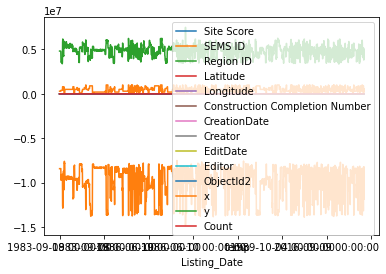

In [ ]:
superfund_timeseries.plot()

We see that the majority of superfund sites were listed in the 1984-1992 rate. After 1992, we see a decrease in the rate of addition of sites to the registry.

###Which States have the most superfund sites?

In [ ]:
superfund_and_census = census.join(superfunds_series)

superfund_states = superfund_and_census['STNAME']

superfund_states

CountyState
Abbeville, South Carolina    South Carolina
Acadia, Louisiana                 Louisiana
Accomack, Virginia                 Virginia
Ada, Idaho                            Idaho
Adair, Iowa                            Iowa
                                  ...      
Yuma, Arizona                       Arizona
Yuma, Colorado                     Colorado
Zapata, Texas                         Texas
Zavala, Texas                         Texas
Ziebach, South Dakota          South Dakota
Name: STNAME, Length: 4087, dtype: object

In [ ]:
state_dict = {}

for state in superfund_states:
  if state in state_dict:
    state_dict[state] += 1
  else:
    state_dict[state] = 1

states = []
state_counts = []

for state in state_dict:
  states.append(state)
  state_counts.append(state_dict[state])

state_dict2 = {'state': states, 'num_superfunds': state_counts}

state_df = pd.DataFrame.from_dict(state_dict2) 
state_df.sort_values(by='num_superfunds', ascending=False)

,state,num_superfunds
30,Texas,292
33,Georgia,170
15,Pennsylvania,156
35,New Jersey,150
2,Virginia,143
23,New York,142
6,Missouri,138
22,California,134
25,Michigan,130
5,Kentucky,125


In [ ]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape(
).encode(
    color='num_superfunds:Q',
    tooltip=['num_superfunds:Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_df, 'state', ['num_superfunds'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300,
    title='Total Superfunds by State'
)

alt.Chart(...)

Use the tooltip to toggle over states and see their individual superfund counts.

#Minority Populations


In [ ]:
census = pd.read_csv('/content/drive/MyDrive/census2019county_full.csv', encoding = 'ISO-8859-1')

Prep from above:

In [ ]:
census = census[census['YEAR'] == 12]

census['CTYNAME']=census['CTYNAME'].str.replace('County', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Parish', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Census Area', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Municipality', '')
census['CTYNAME']=census['CTYNAME'].str.replace('City and Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('city', '')

census['CTYNAME']=census['CTYNAME'].str.strip(' ')

census['CountyState']= census['CTYNAME'].str.cat(census['STNAME'], sep =", ") 

census = census.set_index('CountyState')

census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,0,55869,27092,28777,20878,21729,5237,6000,121,145,286,370,32,26,538,507,21372,22191,5514,6270,274,301,441,509,55,49,26208,27990,20138,21077,5171,5927,105,138,282,364,20,20,492,464,20594,21504,5425,6177,234,274,426,490,39,38,884,787,740,652,66,73,16,7,4,6,12,6,46,43,778,687,89,93,40,27,15,19,16,11
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,1,3277,1713,1564,1249,1117,339,344,4,6,24,20,3,3,94,74,1337,1189,409,396,13,15,46,33,7,6,1627,1504,1180,1072,334,340,3,6,23,19,2,3,85,64,1261,1136,399,390,7,10,43,29,4,3,86,60,69,45,5,4,1,0,1,1,1,0,9,10,76,53,10,6,6,5,3,4,3,3
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,2,3465,1787,1678,1287,1191,388,368,10,9,17,25,0,2,85,83,1369,1270,450,430,21,20,35,38,2,5,1699,1608,1210,1134,388,359,7,8,16,25,0,1,78,81,1286,1211,448,420,13,18,33,38,1,4,88,70,77,57,0,9,3,1,1,0,0,1,7,2,83,59,2,10,8,2,2,0,1,1
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,3,3851,1977,1874,1441,1350,442,418,3,9,18,25,2,4,71,68,1510,1415,490,465,10,14,35,49,6,6,1883,1795,1362,1285,435,409,3,9,17,24,0,3,66,65,1426,1348,479,453,8,12,34,47,4,5,94,79,79,65,7,9,0,0,1,1,2,1,5,3,84,67,11,12,2,2,1,2,2,1
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,4,3659,1854,1805,1341,1334,434,400,5,0,21,13,5,3,48,55,1386,1383,463,432,12,12,33,31,9,4,1791,1731,1291,1272,429,397,4,0,21,13,3,3,43,46,1331,1315,456,426,8,7,33,27,6,4,63,74,50,62,5,3,1,0,0,0,2,0,5,9,55,68,7,6,4,5,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Weston, Wyoming",50,56,45,Wyoming,Weston,12,14,499,280,219,256,203,0,1,2,0,19,12,0,0,3,3,258,206,1,1,5,2,19,13,0,0,276,214,252,198,0,1,2,0,19,12,0,0,3,3,254,201,1,1,5,2,19,13,0,0,4,5,4,5,0,0,0,0,0,0,0,0,0,0,4,5,0,0,0,0,0,0,0,0
"Weston, Wyoming",50,56,45,Wyoming,Weston,12,15,352,180,172,173,169,0,0,1,1,3,1,0,0,3,1,176,170,0,1,3,1,4,1,0,0,176,170,172,167,0,0,1,1,0,1,0,0,3,1,175,168,0,1,3,1,1,1,0,0,4,2,1,2,0,0,0,0,3,0,0,0,0,0,1,2,0,0,0,0,3,0,0,0
"Weston, Wyoming",50,56,45,Wyoming,Weston,12,16,229,107,122,105,120,0,0,0,2,0,0,0,0,2,0,107,120,0,0,2,2,0,0,0,0,105,122,103,120,0,0,0,2,0,0,0,0,2,0,105,120,0,0,2,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0


Making % Columns for each minority category:


In [ ]:
# we just want the total of people, age is not important here
census = census[census['AGEGRP'] == 0]
minority_census = census

minority_census["PCNT_BLACK"] = (minority_census["BA_MALE"] + minority_census["BA_FEMALE"]) / minority_census["TOT_POP"]
minority_census["PCNT_WHITE"] = (minority_census["NHWA_MALE"] + minority_census["NHWA_FEMALE"]) / minority_census["TOT_POP"]
minority_census["PCNT_NATIVE"] = (minority_census["IA_MALE"] + minority_census["IA_FEMALE"]) / minority_census["TOT_POP"]
minority_census["PCNT_ASIAN"] = (minority_census["AA_MALE"] + minority_census["AA_FEMALE"]) / minority_census["TOT_POP"]
minority_census["PCNT_ISLANDER"] = (minority_census["NA_MALE"] + minority_census["NA_FEMALE"]) / minority_census["TOT_POP"]
minority_census["PCNT_HISPANIC"] = (minority_census["H_MALE"] + minority_census["H_FEMALE"]) / minority_census["TOT_POP"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
minority_census = minority_census.squeeze()

superfund_and_minority_census = minority_census.join(superfunds_series)

#remove any counties that aren't in the superfund dataset, or that have a site score of 0
superfund_and_minority_census = superfund_and_minority_census[superfund_and_minority_census['Site Score'].notna()]
superfund_and_minority_census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,...,HNAC_MALE,HNAC_FEMALE,PCNT_BLACK,PCNT_WHITE,PCNT_NATIVE,PCNT_ASIAN,PCNT_ISLANDER,PCNT_HISPANIC,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Acadia, Louisiana",50,22,1,Louisiana,Acadia,12,0,62045,30359,31686,24230,25205,5396,5747,142,111,82,128,7,10,502,485,24686,25664,5791,6108,232,208,140,174,23,29,29368,30945,23390,24581,5321,5688,112,96,...,3,6,0.179595,0.773165,0.004078,0.003385,0.000274,0.027915,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.617500,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Adams, Colorado",50,8,1,Colorado,Adams,12,0,517421,261615,255806,224147,219381,11145,9699,6239,5848,11268,11969,567,566,8249,8343,231691,227068,14327,12744,9642,9409,13981,14695,1087,1101,153774,152508,127158,126522,9100,7742,1516,1549,...,445,431,0.040284,0.490278,0.023360,0.044909,0.002190,0.408060,Sand Creek Industrial,59.65,COD980717953,800260.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.791669,-104.936100,12/30/1982,09/08/1983,09/29/1994,272.0,08/28/1996,12/20/1996,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...",NaN,No,NaN,NaN,NaN,NaN,374.0,-1.168143e+07,4.835714e+06
"Adams, Colorado",50,8,1,Colorado,Adams,12,0,517421,261615,255806,224147,219381,11145,9699,6239,5848,11268,11969,567,566,8249,8343,231691,227068,14327,12744,9642,9409,13981,14695,1087,1101,153774,152508,127158,126522,9100,7742,1516,1549,...,445,431,0.040284,0.490278,0.023360,0.044909,0.002190,0.408060,Woodbury Chemical Co.,44.87,COD980667075,800244.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.795000,-104.942400,12/30/1982,09/08/1983,03/26/1992,75.0,12/29/1992,03/22/1993,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,375.0,-1.168213e+07,4.836197e+06
"Adams, Colorado",50,8,1,Colorado,Adams,12,0,517421,261615,255806,224147,219381,11145,9699,6239,5848,11268,11969,567,566,8249,8343,231691,227068,14327,12744,9642,9409,13981,14695,1087,1101,153774,152508,127158,126522,9100,7742,1516,1549,...,445,431,0.040284,0.490278,0.023360,0.044909,0.002190,0.408060,Rocky Mountain Arsenal (USARMY),58.15,CO5210020769,800357.0,8.0,Colorado,Adams County,Adams,NPL Site,39.835561,-104.884200,10/15/1984,07/22/1987,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur..

The average % Minority for all Superfund Sites

In [ ]:
avg_white = (minority_census['PCNT_WHITE']).mean()
avg_black = (minority_census['PCNT_BLACK']).mean()
avg_native = (minority_census['PCNT_NATIVE']).mean()
avg_islander = (minority_census['PCNT_ISLANDER']).mean()
avg_asian = (minority_census['PCNT_ASIAN']).mean()
avg_hispanic = (minority_census['PCNT_HISPANIC']).mean()

In [ ]:
minority_pct_data = [['White', avg_white*100], ['Hispanic', avg_hispanic*100],
                     ['Black', avg_black*100], ['Native', avg_native*100],
                     ['Asian', avg_asian*100], ['Islander', avg_islander*100],]
minority_pct_avg = pd.DataFrame(minority_pct_data, columns=['Race', 'Avg_Percent'])

minority_pct_avg

,Race,Avg_Percent
0,White,75.787488
1,Hispanic,9.773804
2,Black,9.362755
3,Native,2.384658
4,Asian,1.578008
5,Islander,0.145220


###What is the ethnic makeup for a Superfund site, on average?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


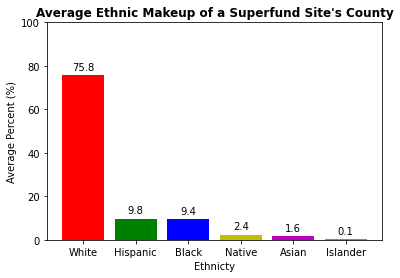

In [ ]:
plt.clf()

xs = minority_pct_avg['Race']
ys = minority_pct_avg['Avg_Percent']

plt.bar(xs, ys, color = 'rgbymc')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys): 

    label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

#plt.xticks(rotation = 45)
plt.title('Average Ethnic Makeup of a Superfund Site\'s County', fontsize = 12, fontweight = 'bold')
plt.xlabel('Ethnicty')
plt.ylabel('Average Percent (%)')
plt.ylim([0,100])

plt.savefig('avg_superfund_ethnicity.jpg')

plt.show()

**Note:** These numbers do not include persons who are mixed-race.

The national averages for ethnic population percentages in 2019 are:

- White (Non-Hispanic): 60.1%

- Black: 13.4%

- Hispanic: 18.5%

- Native: 1.3%

- Asian: 5.9%

- Islander: 0.2%

source: https://www.census.gov/quickfacts/fact/table/US/PST045219 

We thus see that those who identify as White (Non-Hispanic) and Native tend to be in counties that have superfunds on average at a higher rate than they theoretically should be. Those who identify as Native are represented in Superfund Counties at a little under twice a higher rate than they would if the sites were distributed equally. 


#Gender

In [ ]:
census = pd.read_csv('/content/drive/MyDrive/census2019county_full.csv', encoding = 'ISO-8859-1')

In [ ]:
census = census[census['YEAR'] == 12]

census['CTYNAME']=census['CTYNAME'].str.replace('County', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Parish', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Census Area', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Municipality', '')
census['CTYNAME']=census['CTYNAME'].str.replace('City and Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('city', '')

census['CTYNAME']=census['CTYNAME'].str.strip(' ')

census['CountyState']= census['CTYNAME'].str.cat(census['STNAME'], sep =", ") 

census = census.set_index('CountyState')

census = census[census['AGEGRP'] == 0]
census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,0,55869,27092,28777,20878,21729,5237,6000,121,145,286,370,32,26,538,507,21372,22191,5514,6270,274,301,441,509,55,49,26208,27990,20138,21077,5171,5927,105,138,282,364,20,20,492,464,20594,21504,5425,6177,234,274,426,490,39,38,884,787,740,652,66,73,16,7,4,6,12,6,46,43,778,687,89,93,40,27,15,19,16,11
"Baldwin, Alabama",50,1,3,Alabama,Baldwin,12,0,223234,108247,114987,94810,100388,9486,10107,903,839,932,1448,74,80,2042,2125,96730,102373,10346,11008,1818,1785,1405,1946,180,187,102702,109998,89845,95902,9308,9907,753,754,911,1435,53,70,1832,1930,91586,97727,10078,10727,1554,1588,1336,1881,125,152,5545,4989,4965,4486,178,200,150,85,21,13,21,10,210,195,5144,4646,268,281,264,197,69,65,55,35
"Barbour, Alabama",50,1,5,Alabama,Barbour,12,0,24686,13064,11622,6389,5745,6311,5595,103,67,55,61,34,18,172,136,6517,5863,6432,5685,182,115,72,80,38,23,12435,11134,5894,5341,6260,5547,52,43,55,61,21,10,153,132,6008,5455,6369,5635,121,89,71,80,24,15,629,488,495,404,51,48,51,24,0,0,13,8,19,4,509,408,63,50,61,26,1,0,14,8
"Bibb, Alabama",50,1,7,Alabama,Bibb,12,0,22394,11929,10465,8766,8425,2941,1822,53,50,23,25,22,4,124,139,8869,8551,3010,1897,106,101,49,48,28,12,11586,10185,8482,8181,2912,1807,50,41,21,25,5,1,116,130,8578,8298,2978,1878,100,86,44,47,11,9,343,280,284,244,29,15,3,9,2,0,17,3,8,9,291,253,32,19,6,15,5,1,17,3
"Blount, Alabama",50,1,9,Alabama,Blount,12,0,57826,28472,29354,27258,28154,516,462,192,178,85,100,42,25,379,435,27608,28559,658,618,400,420,147,165,60,37,25522,26722,24494,25682,453,419,143,139,73,90,14,7,345,385,24814,26043,582,560,333,354,129,144,26,16,2950,2632,2764,2472,63,43,49,39,12,10,28,18,34,50,2794,2516,76,58,67,66,18,21,34,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sweetwater, Wyoming",50,56,37,Wyoming,Sweetwater,12,0,42343,21808,20535,20446,19252,347,251,324,302,203,250,35,34,453,446,20879,19675,481,389,557,499,313,369,62,65,18257,17314,17223,16338,298,204,177,158,183,227,26,29,350,358,17558,16678,398,316,345,303,280,333,46,56,3551,3221,3223,2914,49,47,147,144,20,23,9,5,103,88,3321,2997,83,73,212,196,33,36,16,9
"Teton, Wyoming",50,56,39,Wyoming,Teton,12,0,23464,12142,11322,11567,10718,101,71,106,102,143,252,20,13,205,166,11761,10873,147,110,204,170,215,321,43,30,10258,9652,9832,9168,87,58,33,41,135,243,11,7,160,135,9983,9295,122,87,99,89,199,306,31,23,1884,1670,1735,1550,14,13,73,61,8,9,9,6,45,31,1778,1578,25,23,105,81,16,15,12,7
"Uinta, Wyoming",50,56,41,Wyoming,Uinta,12,0,20226,10224,10002,9753,9524,77,75,135,157,38,62,17,14,204,170,9945,9685,122,111,256,245,85,118,37,30,9297,9058,8935,8722,64,62,69,75,36,56,11,13,182,130,9105,8845,105,88,174,134,82,106,29,28,927,944,818,802,13,13,66,82,2,6,6,1,22,40,840,840,17,23,82,111,3,12,8,2


In [ ]:
gender_census = census

gender_census['PCT_TOT_F'] = census['TOT_FEMALE'] / census['TOT_POP']
gender_census['PCT_TOT_M'] = census['TOT_MALE'] / census['TOT_POP']
gender_census['PCT_WHITE_F'] = census['NHWA_FEMALE'] / census['TOT_POP']
gender_census['PCT_WHITE_M'] = census['NHWA_MALE'] / census['TOT_POP']
gender_census['PCT_BLACK_F'] = census['BA_FEMALE'] / census['TOT_POP']
gender_census['PCT_BLACK_M'] = census['BA_MALE'] / census['TOT_POP']
gender_census['PCT_NATIVE_F'] = census['IA_FEMALE'] / census['TOT_POP']
gender_census['PCT_NATIVE_M'] = census['IA_MALE'] / census['TOT_POP']
gender_census['PCT_ASIAN_F'] = census['AA_FEMALE'] / census['TOT_POP']
gender_census['PCT_ASIAN_M'] = census['AA_MALE'] / census['TOT_POP']
gender_census['PCT_ISLANDER_F'] = census['NA_FEMALE'] / census['TOT_POP']
gender_census['PCT_ISLANDER_M'] = census['NA_MALE'] / census['TOT_POP']

gender_census

In [ ]:
for index, row in gender_census.iterrows():
  if row['PCT_TOT_F'] > row['PCT_TOT_M']:
    gender_census['HIGH_POP_GENDER1'][index] = 'F'
  else:
    gender_census['HIGH_POP_GENDER1'][index] = 'M'

gender_census['HIGH_POP_GENDER1'].value_counts('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


F    0.602164
M    0.397836
Name: HIGH_POP_GENDER1, dtype: float64

For all of the counties in the census data, 60.2% have more women than men. 

Joining it with the superfund data:

In [ ]:
gender_census = gender_census.squeeze()

superfund_and_gender_census = gender_census.join(superfunds_series)

#remove any counties that aren't in the superfund dataset, or that have a site score of 0
superfund_and_gender_census = superfund_and_gender_census[superfund_and_gender_census['Site Score'].notna()]
superfund_and_gender_census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,...,PCT_NATIVE_F,PCT_NATIVE_M,PCT_ASIAN_F,PCT_ASIAN_M,PCT_ISLANDER_F,PCT_ISLANDER_M,HIGH_POP_GENDER,HIGH_POP_GENDER1,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Acadia, Louisiana",50,22,1,Louisiana,Acadia,12,0,62045,30359,31686,24230,25205,5396,5747,142,111,82,128,7,10,502,485,24686,25664,5791,6108,232,208,140,174,23,29,29368,30945,23390,24581,5321,5688,112,96,...,0.001789,0.002289,0.002063,0.001322,0.000161,0.000113,F,F,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.617500,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Adams, Colorado",50,8,1,Colorado,Adams,12,0,517421,261615,255806,224147,219381,11145,9699,6239,5848,11268,11969,567,566,8249,8343,231691,227068,14327,12744,9642,9409,13981,14695,1087,1101,153774,152508,127158,126522,9100,7742,1516,1549,...,0.011302,0.012058,0.023132,0.021777,0.001094,0.001096,M,M,Sand Creek Industrial,59.65,COD980717953,800260.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.791669,-104.936100,12/30/1982,09/08/1983,09/29/1994,272.0,08/28/1996,12/20/1996,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...",NaN,No,NaN,NaN,NaN,NaN,374.0,-1.168143e+07,4.835714e+06
"Adams, Colorado",50,8,1,Colorado,Adams,12,0,517421,261615,255806,224147,219381,11145,9699,6239,5848,11268,11969,567,566,8249,8343,231691,227068,14327,12744,9642,9409,13981,14695,1087,1101,153774,152508,127158,126522,9100,7742,1516,1549,...,0.011302,0.012058,0.023132,0.021777,0.001094,0.001096,M,M,Woodbury Chemical Co.,44.87,COD980667075,800244.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.795000,-104.942400,12/30/1982,09/08/1983,03/26/1992,75.0,12/29/1992,03/22/1993,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,375.0,-1.168213e+07,4.836197e+06
"Adams, Colorado",50,8,1,Colorado,Adams,12,0,517421,261615,255806,224147,219381,11145,9699,6239,5848,11268,11969,567,566,8249,8343,231691,227068,14327,12744,9642,9409,13981,14695,1087,1101,153774,152508,127158,126522,9100,7742,1516,1549,...,0.011302,0.012058,0.023132,0.021777,0.001094,0.001096,M,M,Rocky Mountain Arsenal (USARMY),58.15,CO5210020769,800357.0,8.0,Colorado,Adams County,Adams,NPL Site,39.835561,-104.884200,10/15/1984,07/22/1987,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad

In [ ]:
superfund_and_gender_census['PCT_TOT_F']

In [ ]:
for index, row in superfund_and_gender_census.iterrows():
  if row['PCT_TOT_F'] > row['PCT_TOT_M']:
    superfund_and_gender_census['HIGH_POP_GENDER'][index] = 'F'
  else:
    superfund_and_gender_census['HIGH_POP_GENDER'][index] = 'M'

superfund_and_gender_census['HIGH_POP_GENDER'].value_counts('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


F    0.778308
M    0.221692
Name: HIGH_POP_GENDER, dtype: float64

However, for counties that contain at least one superfund, 77% have more women than men. That is 17.6% higher than American counties in general, as we showed above. 

###Let's visually explore this just a bit:

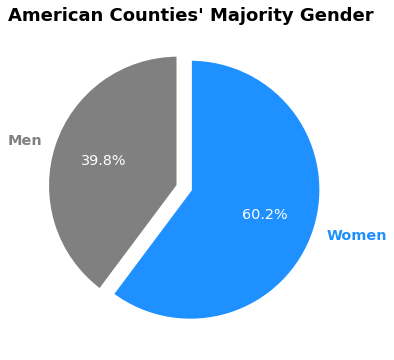

In [ ]:
import numpy as np

data_labels = ['Men', 'Women']
data = [0.397836, 0.602164]

fig, ax = plt.subplots(figsize=(6, 6))

# Get four different grey colors.
colors = ['grey', 'dodgerblue']

patches, texts, pcts = ax.pie(
    data, labels=data_labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('American Counties\' Majority Gender', fontsize=18, fontweight = 'bold')
plt.show()

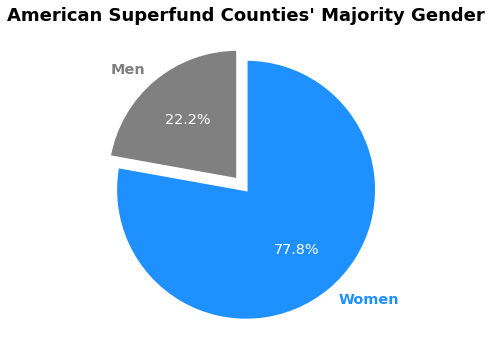

In [ ]:
# American county with at least 1 Superfund Site
from matplotlib import pyplot as plt 
import numpy as np 
  
data_labels = ['Men', 'Women']
data = [0.221692, 0.778308] 

fig, ax = plt.subplots(figsize=(6, 6))

# Get four different grey colors.
colors = ['grey', 'dodgerblue']

patches, texts, pcts = ax.pie(
    data, labels=data_labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('American Superfund Counties\' Majority Gender', fontsize=18, fontweight = 'bold')
plt.show()

#Age

In [ ]:
census = pd.read_csv('/content/drive/MyDrive/census2019county_full.csv', encoding = 'ISO-8859-1')

In [ ]:
census = census[census['YEAR'] == 12]

census['CTYNAME']=census['CTYNAME'].str.replace('County', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Parish', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Census Area', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Municipality', '')
census['CTYNAME']=census['CTYNAME'].str.replace('City and Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('city', '')

census['CTYNAME']=census['CTYNAME'].str.strip(' ')

census['CountyState']= census['CTYNAME'].str.cat(census['STNAME'], sep =", ") 

census = census.set_index('CountyState')

#census = census[census['AGEGRP'] == 0]
census

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,0,55869,27092,28777,20878,21729,5237,6000,121,145,286,370,32,26,538,507,21372,22191,5514,6270,274,301,441,509,55,49,26208,27990,20138,21077,5171,5927,105,138,282,364,20,20,492,464,20594,21504,5425,6177,234,274,426,490,39,38,884,787,740,652,66,73,16,7,4,6,12,6,46,43,778,687,89,93,40,27,15,19,16,11
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,1,3277,1713,1564,1249,1117,339,344,4,6,24,20,3,3,94,74,1337,1189,409,396,13,15,46,33,7,6,1627,1504,1180,1072,334,340,3,6,23,19,2,3,85,64,1261,1136,399,390,7,10,43,29,4,3,86,60,69,45,5,4,1,0,1,1,1,0,9,10,76,53,10,6,6,5,3,4,3,3
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,2,3465,1787,1678,1287,1191,388,368,10,9,17,25,0,2,85,83,1369,1270,450,430,21,20,35,38,2,5,1699,1608,1210,1134,388,359,7,8,16,25,0,1,78,81,1286,1211,448,420,13,18,33,38,1,4,88,70,77,57,0,9,3,1,1,0,0,1,7,2,83,59,2,10,8,2,2,0,1,1
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,3,3851,1977,1874,1441,1350,442,418,3,9,18,25,2,4,71,68,1510,1415,490,465,10,14,35,49,6,6,1883,1795,1362,1285,435,409,3,9,17,24,0,3,66,65,1426,1348,479,453,8,12,34,47,4,5,94,79,79,65,7,9,0,0,1,1,2,1,5,3,84,67,11,12,2,2,1,2,2,1
"Autauga, Alabama",50,1,1,Alabama,Autauga,12,4,3659,1854,1805,1341,1334,434,400,5,0,21,13,5,3,48,55,1386,1383,463,432,12,12,33,31,9,4,1791,1731,1291,1272,429,397,4,0,21,13,3,3,43,46,1331,1315,456,426,8,7,33,27,6,4,63,74,50,62,5,3,1,0,0,0,2,0,5,9,55,68,7,6,4,5,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Weston, Wyoming",50,56,45,Wyoming,Weston,12,14,499,280,219,256,203,0,1,2,0,19,12,0,0,3,3,258,206,1,1,5,2,19,13,0,0,276,214,252,198,0,1,2,0,19,12,0,0,3,3,254,201,1,1,5,2,19,13,0,0,4,5,4,5,0,0,0,0,0,0,0,0,0,0,4,5,0,0,0,0,0,0,0,0
"Weston, Wyoming",50,56,45,Wyoming,Weston,12,15,352,180,172,173,169,0,0,1,1,3,1,0,0,3,1,176,170,0,1,3,1,4,1,0,0,176,170,172,167,0,0,1,1,0,1,0,0,3,1,175,168,0,1,3,1,1,1,0,0,4,2,1,2,0,0,0,0,3,0,0,0,0,0,1,2,0,0,0,0,3,0,0,0
"Weston, Wyoming",50,56,45,Wyoming,Weston,12,16,229,107,122,105,120,0,0,0,2,0,0,0,0,2,0,107,120,0,0,2,2,0,0,0,0,105,122,103,120,0,0,0,2,0,0,0,0,2,0,105,120,0,0,2,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [ ]:
age_census = census[['AGEGRP','TOT_POP']].copy()

#age_census['TOTAL'] = age_census[['AGEGRP'] == 0, 'TOT_POP']

total_cty_pop_dict = {}

for index, row in age_census.iterrows():
  if row['AGEGRP'] == 0:
    total_cty_pop_dict[index] = row['TOT_POP']
  
total_cty_pop_dict  


{'Autauga, Alabama': 55869,
 'Baldwin, Alabama': 223234,
 'Barbour, Alabama': 24686,
 'Bibb, Alabama': 22394,
 'Blount, Alabama': 57826,
 'Bullock, Alabama': 10101,
 'Butler, Alabama': 19448,
 'Calhoun, Alabama': 113605,
 'Chambers, Alabama': 33254,
 'Cherokee, Alabama': 26196,
 'Chilton, Alabama': 44428,
 'Choctaw, Alabama': 12589,
 'Clarke, Alabama': 23622,
 'Clay, Alabama': 13235,
 'Cleburne, Alabama': 14910,
 'Coffee, Alabama': 52342,
 'Colbert, Alabama': 55241,
 'Conecuh, Alabama': 12067,
 'Coosa, Alabama': 10663,
 'Covington, Alabama': 37049,
 'Crenshaw, Alabama': 13772,
 'Cullman, Alabama': 83768,
 'Dale, Alabama': 49172,
 'Dallas, Alabama': 37196,
 'DeKalb, Alabama': 71513,
 'Elmore, Alabama': 81209,
 'Escambia, Alabama': 36633,
 'Etowah, Alabama': 102268,
 'Fayette, Alabama': 16302,
 'Franklin, Alabama': 31362,
 'Geneva, Alabama': 26271,
 'Greene, Alabama': 8111,
 'Hale, Alabama': 14651,
 'Henry, Alabama': 17205,
 'Houston, Alabama': 105882,
 'Jackson, Alabama': 51626,
 'Jeffe

In [ ]:
#temp to initiate the columns
age_census['CTY_POP_TOTAL'] = 1
age_census['AGE_PCT_TOTAL'] = 0

for index, row in age_census.iterrows():
  age_census['CTY_POP_TOTAL'][index] = total_cty_pop_dict[index]

age_census

,AGEGRP,TOT_POP,CTY_POP_TOTAL,AGE_PCT_TOTAL
CountyState,,,,
"Autauga, Alabama",0,55869,55869,0
"Autauga, Alabama",1,3277,55869,0
"Autauga, Alabama",2,3465,55869,0
"Autauga, Alabama",3,3851,55869,0
"Autauga, Alabama",4,3659,55869,0
...,...,...,...,...
"Weston, Wyoming",14,499,6927,0
"Weston, Wyoming",15,352,6927,0
"Weston, Wyoming",16,229,6927,0


Calculate the % of each age group in each city's population.

In [ ]:
age_census['AGE_PCT_TOTAL'] = age_census['TOT_POP'] / age_census['CTY_POP_TOTAL']
age_census.tail(35)

,AGEGRP,TOT_POP,CTY_POP_TOTAL,AGE_PCT_TOTAL
CountyState,,,,
"Washakie, Wyoming",3,557,7805,0.071365
"Washakie, Wyoming",4,562,7805,0.072005
"Washakie, Wyoming",5,341,7805,0.043690
"Washakie, Wyoming",6,365,7805,0.046765
"Washakie, Wyoming",7,400,7805,0.051249
"Washakie, Wyoming",8,507,7805,0.064958
"Washakie, Wyoming",9,453,7805,0.058040
"Washakie, Wyoming",10,440,7805,0.056374
"Washakie, Wyoming",11,476,7805,0.060987


Let's narrow it down to counties that contain a Superfund site:

In [ ]:
age_census = age_census.squeeze()

superfund_and_age_census = age_census.join(superfunds_series)

#remove any counties that aren't in the superfund dataset, or that have a site score of 0
superfund_and_age_census = superfund_and_age_census[superfund_and_age_census['Site Score'].notna()]
superfund_and_age_census.head(35)

,AGEGRP,TOT_POP,CTY_POP_TOTAL,AGE_PCT_TOTAL,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Acadia, Louisiana",0,62045,62045,1.000000,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.6175,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Acadia, Louisiana",1,4259,62045,0.068644,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.6175,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Acadia, Louisiana",2,4394,62045,0.070820,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.6175,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Acadia, Louisiana",3,4607,62045,0.074253,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.6175,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Acadia, Louisiana",4,4142,62045,0.066758,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.6175,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Acadia, Louisiana",5,3650,62045,0.058828,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.6175,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Acadia, Louisiana",6,4244,62045,0.068402,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.6175,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Acadia, Louisiana",7,3951,62045,0.063680,EVR-Wood T

In [ ]:
age_dict = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0,
            '10':0, '11':0, '12':0, '13':0, '14':0, '15':0, '16':0, '17':0, '18':0}

In [ ]:
for i in range(1,19):
  count = 0
  for index, row in superfund_and_age_census.iterrows():
    if row['AGEGRP'] == i:
      age_dict[str(i)] += row['AGE_PCT_TOTAL']
      count += 1
  
  # to find the average % age group
  age_dict[str(i)] = age_dict[str(i)] / count

age_dict

{'1': 0.058549060389164784,
 '10': 0.0615970800497615,
 '11': 0.06391690156854578,
 '12': 0.07029329097479328,
 '13': 0.06707232329939783,
 '14': 0.056914632075331935,
 '15': 0.045386715482343624,
 '16': 0.031223323135145403,
 '17': 0.02038305439963765,
 '18': 0.02157419595202451,
 '2': 0.06103631231294776,
 '3': 0.0634339679712258,
 '4': 0.0644464364618783,
 '5': 0.06487180772708122,
 '6': 0.06821992517731676,
 '7': 0.06513973740098775,
 '8': 0.0643385044899364,
 '9': 0.059358771449809576}

In [ ]:
age_df = pd.DataFrame(list(age_dict.items()),columns = ['age_group','avg_pct']) 
age_df.set_index('age_group')
age_df

,age_group,avg_pct
0,1,0.058549
1,2,0.061036
2,3,0.063434
3,4,0.064446
4,5,0.064872
5,6,0.068220
6,7,0.065140
7,8,0.064339
8,9,0.059359
9,10,0.061597


###Superfund Age Distribution by County (average)

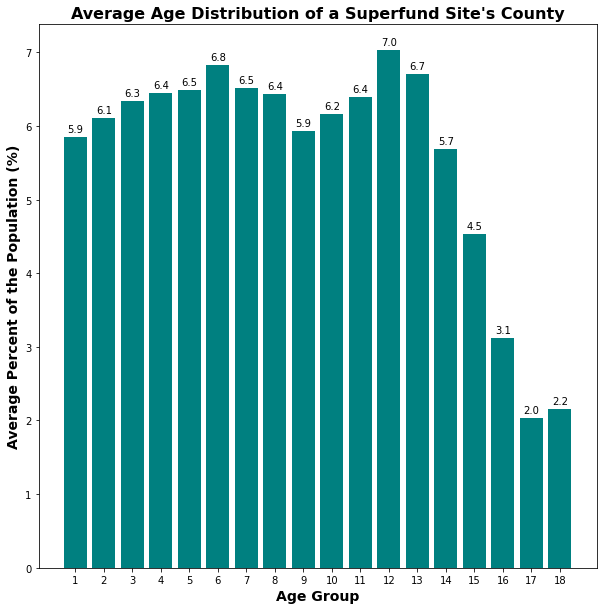

In [ ]:
import matplotlib.pyplot as plt


plt.clf()
plt.rcParams["figure.figsize"] = [10, 10]

xs = age_df['age_group']
ys = age_df['avg_pct']*100

plt.bar(xs, ys, color = 'teal')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys): 

    label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.title('Average Age Distribution of a Superfund Site\'s County', fontsize = 16, fontweight = 'bold')
plt.xlabel('Age Group', fontsize = 14, fontweight = 'bold')
plt.ylabel('Average Percent of the Population (%)', fontsize = 14, fontweight = 'bold')

plt.savefig('superfung_age_dist.jpg')

Using the key below, we find that the most prevalent age group in Superfund Counties are 

1) those in the 55 to 59 year old range, followed by 

2) 25 to 29 year olds, and

3) the 60 to 64 year olds, to round out the top three age groups. 


The least prevalent age groups, by comparison, appear to be:

1) 80 to 84 year olds

2) 85+

3) 75 to 79 year olds


Let's compare this histogram to the US's age distribution as a whole:


1 = Age 0 to 4 years: 6.1%

2 = Age 5 to 9 years: 6.2%

3 = Age 10 to 14 years: 6.4%

4 = Age 15 to 19 years: 6.4%

5 = Age 20 to 24 years: 6.6%

6 = Age 25 to 29 years: 7.2%

7 = Age 30 to 34 years: 6.8%

8 = Age 35 to 39 years: 6.6%

9 = Age 40 to 44 years: 6.0%

10 = Age 45 to 49 years: 6.3%

11 = Age 50 to 54 years: 6.3%

12 = Age 55 to 59 years: 6.5%

13 = Age 60 to 64 years: 6.3%

14 = Age 65 to 69 years: 5.4%

15 = Age 70 to 74 years: 4.4%

16 = Age 75 to 79 years: 2.9%

17 = Age 80 to 84 years: 1.9%

18 = Age 85 years or older: 1.8%

source: https://www.census.gov/data/tables/2019/demo/age-and-sex/2019-age-sex-composition.html (table 1)



###USA Age Distribution (average)

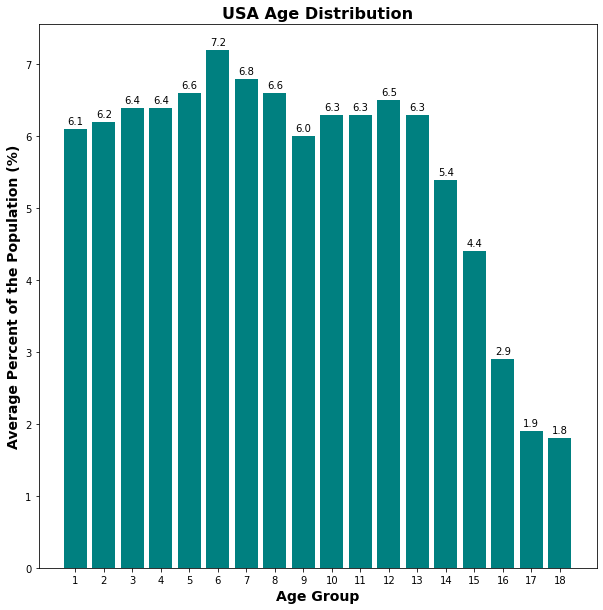

In [ ]:
import matplotlib.pyplot as plt


plt.clf()
plt.rcParams["figure.figsize"] = [10, 10]

xs = ['1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']
ys = [6.1, 6.2, 6.4, 6.4, 6.6, 7.2, 6.8, 6.6, 6.0, 6.3, 6.3, 6.5, 6.3, 5.4, 4.4, 2.9, 1.9, 1.8]

plt.bar(xs, ys, color = 'teal')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys): 

    label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.title('USA Age Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Age Group', fontsize = 14, fontweight = 'bold')
plt.ylabel('Average Percent of the Population (%)', fontsize = 14, fontweight = 'bold')

plt.savefig('usa_age_dist.jpg')

Comparing these two bar plots, we can see that *older folks are disproportionately affected by Superfund Sites, particularly those in the 50 to 64 year old range.*

The key for AGEGRP is as follows: (https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/cc-est2019-alldata.pdf)

---

0 = Total Population

1 = Age 0 to 4 years

2 = Age 5 to 9 years

3 = Age 10 to 14 years

4 = Age 15 to 19 years

5 = Age 20 to 24 years

6 = Age 25 to 29 years

7 = Age 30 to 34 years

8 = Age 35 to 39 years

9 = Age 40 to 44 years

10 = Age 45 to 49 years

11 = Age 50 to 54 years

12 = Age 55 to 59 years

13 = Age 60 to 64 years

14 = Age 65 to 69 years

15 = Age 70 to 74 years

16 = Age 75 to 79 years

17 = Age 80 to 84 years

18 = Age 85 years or older

#Superfund Scores
